<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/PCA/Intro_to_PCA_Transforming_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import ticker, cm

See also related Desmos explorer https://www.desmos.com/calculator/cbvdgnc7gi

# Create some data with 2 features

In [2]:
n = 15
m = 2

X_1 = np.random.randn(n)
a = 0.9
b = np.sqrt(1 - a**2)
X_2 = a*X_1 + b*np.random.randn(n)
X = np.column_stack((X_1,X_2))

ep = 0.1

true_beta1 = 2
true_beta2 = 3

Y = true_beta1*X_1 + true_beta2*X_2 + ep*np.random.randn(n)


# The points X and the projection ||Xw||^2


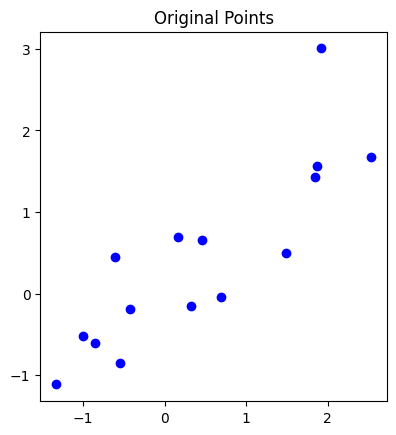

In [3]:
fig,ax=plt.subplots(1,1)
plt.title("Original Points")
plt.plot(X[:,0],X[:,1],'bo')
ax.set_aspect('equal', 'box')

<ipython-input-4-f478d17b4171>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


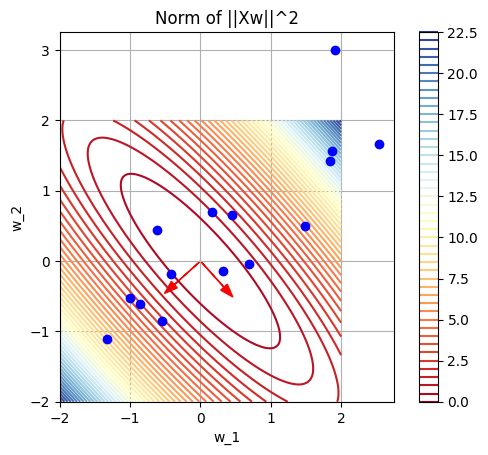

In [4]:
def make_grid(n_grid,grid_scale=5):
  axis_1 = np.linspace(-grid_scale, +grid_scale, n_grid)
  axis_2 = np.linspace(-grid_scale, +grid_scale, n_grid)
  return np.meshgrid(axis_2, axis_1)

def plot_XT_X_surface():
  my_grid_scale = 2
  w1,w2 = make_grid(n_grid=100,grid_scale=my_grid_scale)
  w = np.stack((w1,w2)) #shape (2,n_grid,n_grid)
  Xw = np.einsum('ia,ajk->ijk',X,w)

  #shape (n_grid,n_grid)
  val = (1/n)*np.sum( ( Xw )**2 ,axis=0)

  fig,ax=plt.subplots(1,1)
  ax.set_aspect('equal', 'box')
  cm = plt.cm.get_cmap('RdYlBu')
  cp = ax.contour(w1, w2, val,50,cmap=cm)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('Norm of ||Xw||^2')
  ax.set_xlabel('w_1')
  ax.set_ylabel('w_2')


  lambdas, eigs = np.linalg.eigh(X.T @ X)
  eig0 = eigs[:,0]
  eig1 = eigs[:,1]

  arrow_len = my_grid_scale/4
  ax.arrow(0,0,arrow_len*eig0[0],arrow_len*eig0[1],head_width=arrow_len/4,color='r')
  ax.arrow(0,0,arrow_len*eig1[0],arrow_len*eig1[1],head_width=arrow_len/4,color='r')

  ax.plot(X[:,0],X[:,1],'bo')

  ax.grid()

plot_XT_X_surface()

(-2.0, 2.0)

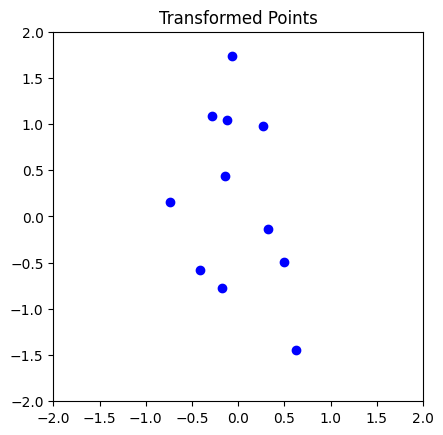

In [5]:
lambdas, eigs = np.linalg.eigh(X.T @ X)
eig0 = eigs[:,0]
eig1 = eigs[:,1]

T = np.zeros_like(X)
T[:,0] = X@eig0
T[:,1] = X@eig1


fig,ax=plt.subplots(1,1)
plt.title("Transformed Points")
plt.plot(T[:,0],T[:,1],'bo')
ax.set_aspect('equal', 'box')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)